In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [50]:
# file paths/names

csv_file = '/Users/Nic/Onedrive/Documents/Machine Learning Docs/ml/ML_assignment_3/cluster_images.csv'


In [51]:
data = pd.read_csv(csv_file, encoding = "ISO-8859-1")
print(data.shape)
print(data.head())

(404, 30)
   s_no              artist                         title art_movement  \
0     2  Giorgio de Chirico  The Uncertainty of the Poet    surrealism   
1     3    Giovanni Anselmo                     Direction  arte povera   
2     4        Milton Avery                   Yellow Sky     modernism   
3     5       Gillian Avery                  Distillation  abstraction   
4     6   Joseph (Jef) Banc          Pair-Bearing Matrix   abstraction   

  museum_venue country_of_origin  has_text primary_medium  \
0         Tate             Italy     False       painting   
1         Tate             Italy     False      sculpture   
2         Tate           America     False       painting   
3         Tate                UK     False       painting   
4         Tate            France     False       painting   

                                        medium          work_size  \
0                      painting, oil on canvas        106 x 94 cm   
1             sculpture, fabric, glass &

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# vectorizer = HashingVectorizer(ngram_range=(1,4), n_features=2 ** 18, non_negative = True)
vectorizer = CountVectorizer()
X_movement = vectorizer.fit_transform(data['art_movement'].values.astype('str'))
X_notes = vectorizer.fit_transform(data['notes'].values.astype('str'))
X_medium = vectorizer.fit_transform(data['medium'].values.astype('str'))
X_primary_medium = vectorizer.fit_transform(data['primary_medium'].values.astype('str'))



In [68]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
T_notes = transformer.fit_transform(X_notes)*5
T_movement = transformer.fit_transform(X_movement)*5
T_medium = transformer.fit_transform(X_medium)*5
T_primary_medium = transformer.fit_transform(X_primary_medium)*5

print(T_medium)

  (0, 273)	2.3987968069079257
  (0, 262)	2.91440597483708
  (0, 264)	1.6974547347174211
  (0, 59)	2.8054695002062813
  (1, 345)	1.666636345755577
  (1, 130)	2.8989037527025037
  (1, 157)	2.7388994888477294
  (1, 234)	2.513386144937439
  (2, 273)	2.3987968069079257
  (2, 262)	2.91440597483708
  (2, 264)	1.6974547347174211
  (2, 59)	2.8054695002062813
  (3, 273)	1.0343592602094918
  (3, 262)	1.2566895200966945
  (3, 264)	0.7319411208924476
  (3, 180)	3.2091128378041316
  (3, 271)	1.8320257098270023
  (3, 175)	2.8566363365360843
  (4, 273)	1.464514027559911
  (4, 264)	1.0363304899284327
  (4, 59)	1.7127959421622223
  (4, 242)	3.046495107388167
  (4, 233)	3.092962237062964
  (5, 273)	1.1076286098822306
  (5, 264)	0.7837885321252367
  :	:
  (398, 319)	1.5161460987257172
  (398, 28)	3.15579180330349
  (398, 190)	3.15579180330349
  (399, 112)	5.0
  (400, 264)	0.7347940487948933
  (400, 277)	1.0985189646382414
  (400, 112)	1.5115012634033405
  (400, 189)	1.9122192181506477
  (400, 427)	2.86777

In [54]:
data.has_text = data.has_text.astype(int)*5
data.kinetic = data.kinetic.astype(int)*5
data.reflection = data.kinetic.astype(int)*5


    

In [71]:
X_quant_features = data[[ "si", "va", "te", "co", "or", "sh", "po", "li", "reflection"]]
print(X_quant_features.head(10))
print(type(X_quant_features))

   si  va  te  co  or  sh  po  li  reflection
0   2   3   0   0   4   3   0   0           0
1   3   1   3   0   3   2   0   0           0
2   0   2   4   4   2   4   0   0           0
3   3   1   2   0   2   4   0   0           0
4   0   1   4   1   0   4   0   0           0
5   3   1   2   0   0   0   0   5           0
6   0   4   1   0   4   1   0   0           0
7   0   1   5   0   0   1   0   0           0
8   0   1   1   0   4   3   0   5           0
9   1   5   3   0   0   1   0   0           0
<class 'pandas.core.frame.DataFrame'>


In [74]:

X_quant_features_csr = csr_matrix(X_quant_features)
X = hstack([T_notes, X_quant_features_csr, T_medium])
# X = hstack([X_quant_features_csr])
X = X.toarray()
print(X.shape)

(404, 2513)


In [57]:
from sklearn.cluster import KMeans

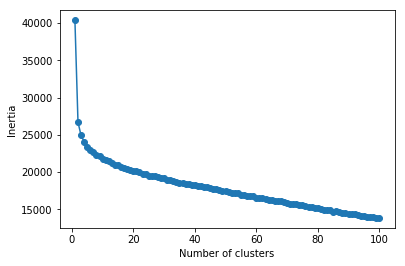

In [75]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [61]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [4, 8, 14, 18, 22, 26, 30, 36]

For n_clusters = 4 The average silhouette_score is : 0.17730041565636773


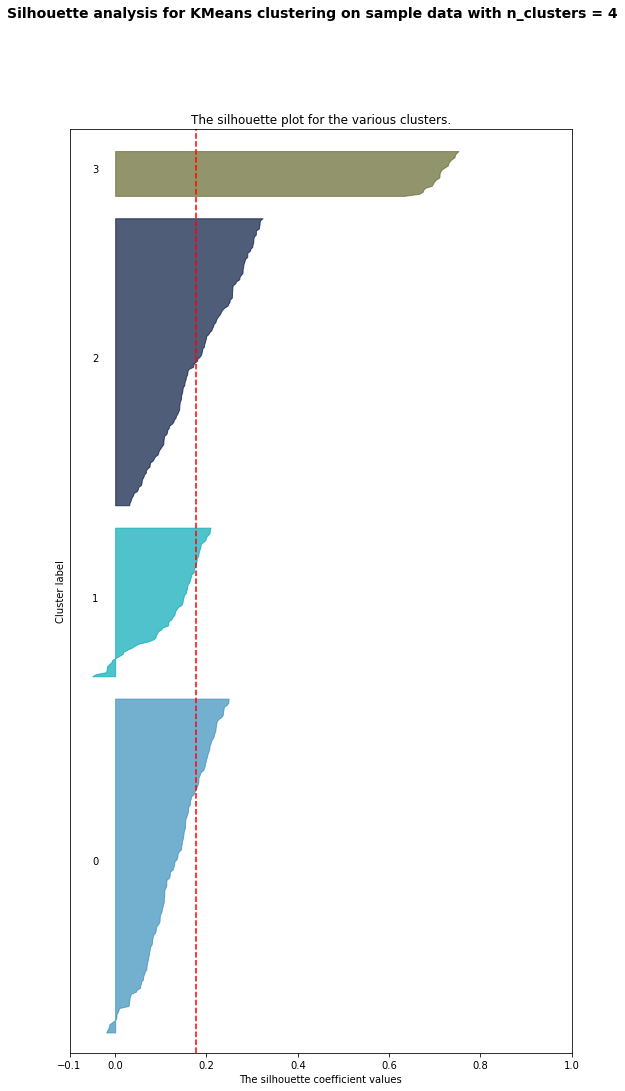

For n_clusters = 8 The average silhouette_score is : 0.16355465091240043


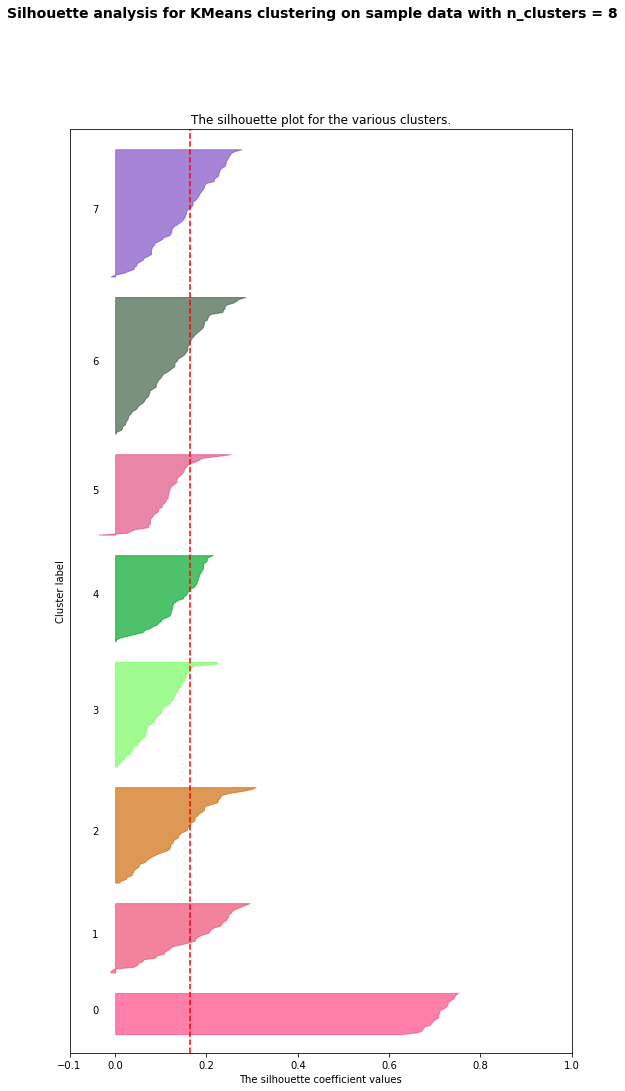

For n_clusters = 14 The average silhouette_score is : 0.16682915405321377


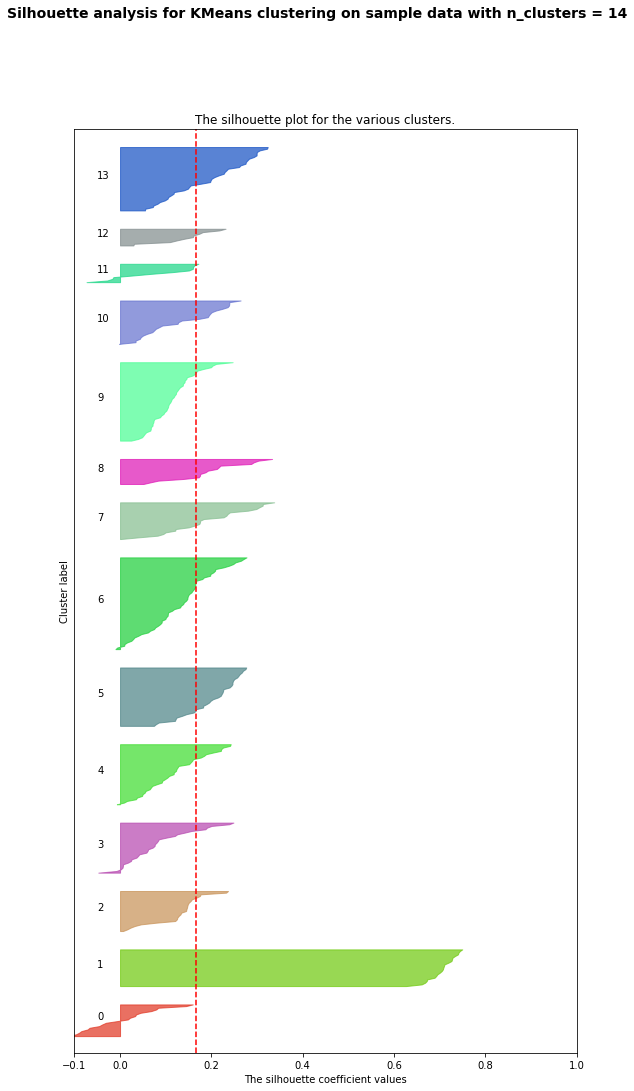

For n_clusters = 18 The average silhouette_score is : 0.13265688415725027


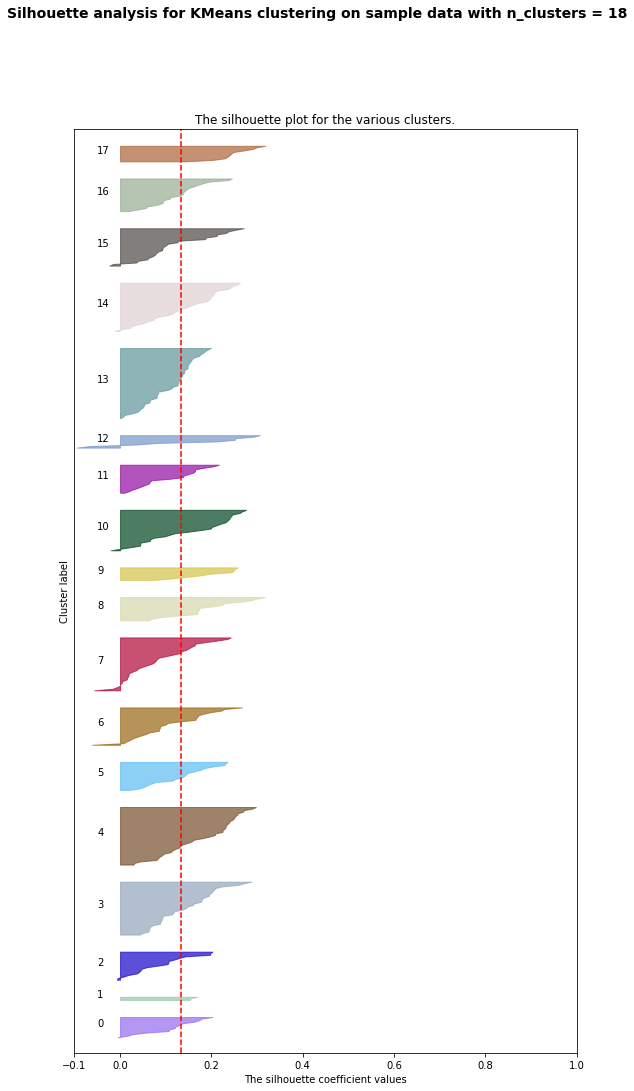

For n_clusters = 22 The average silhouette_score is : 0.1307561237981429


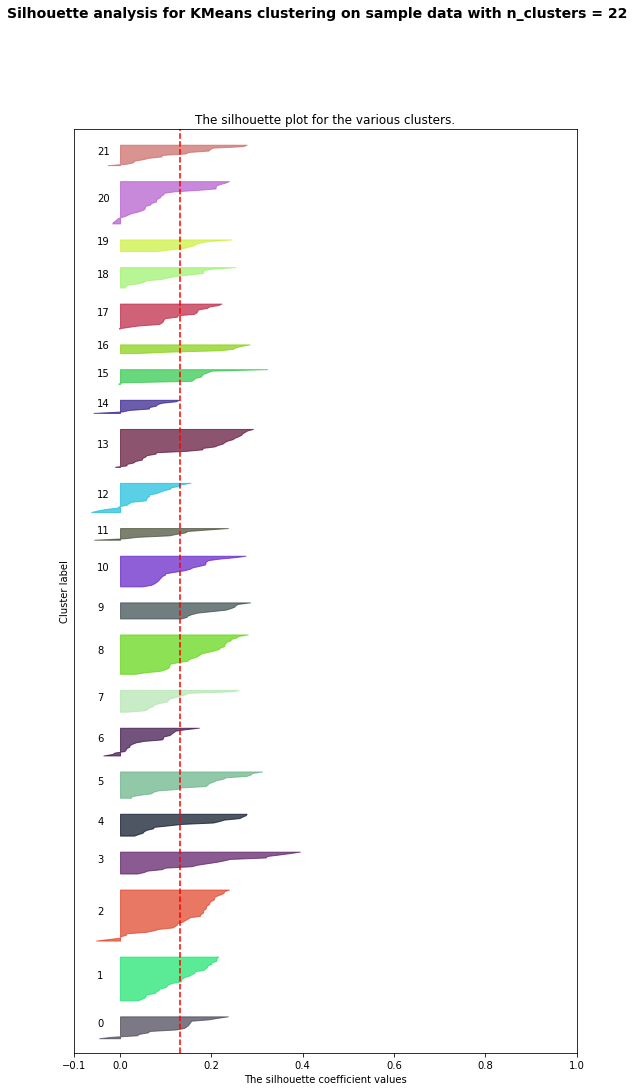

For n_clusters = 26 The average silhouette_score is : 0.12698556206786402


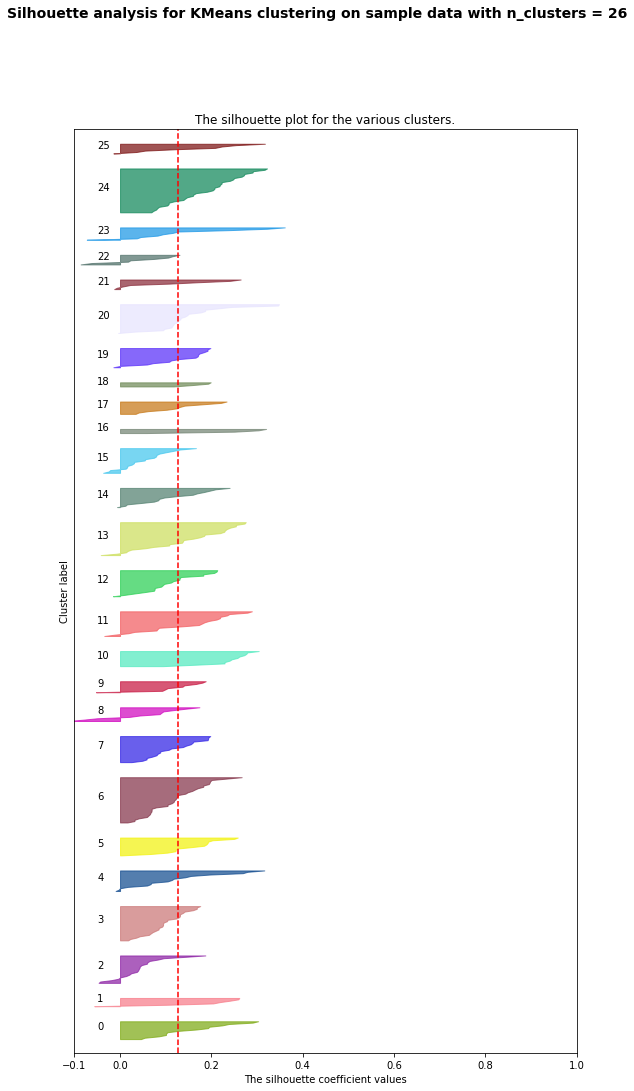

For n_clusters = 30 The average silhouette_score is : 0.1211642118068402


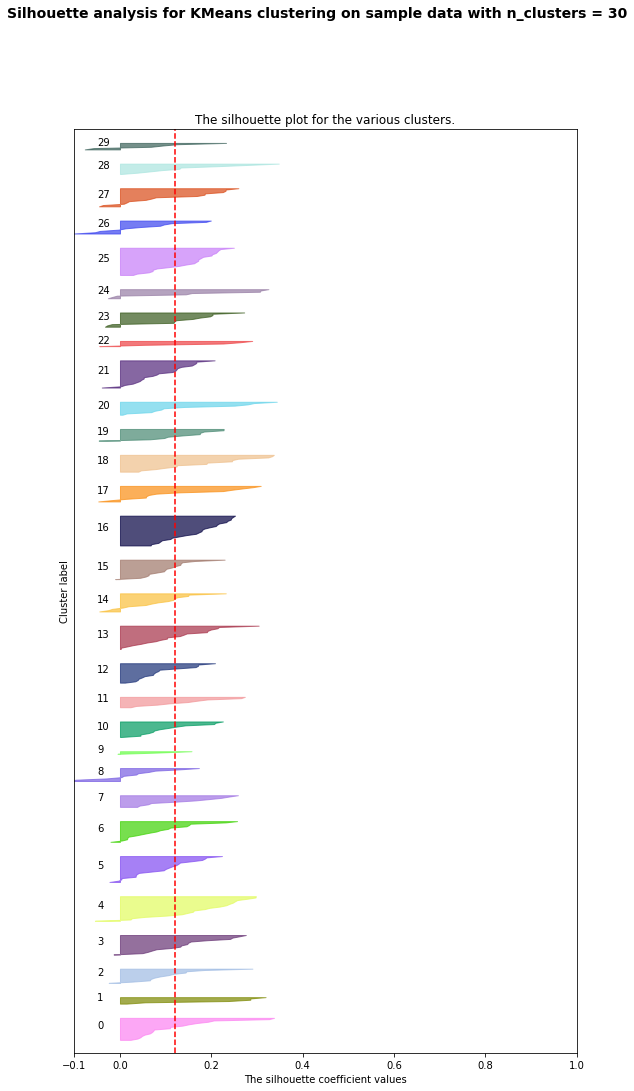

For n_clusters = 36 The average silhouette_score is : 0.12361663639481595


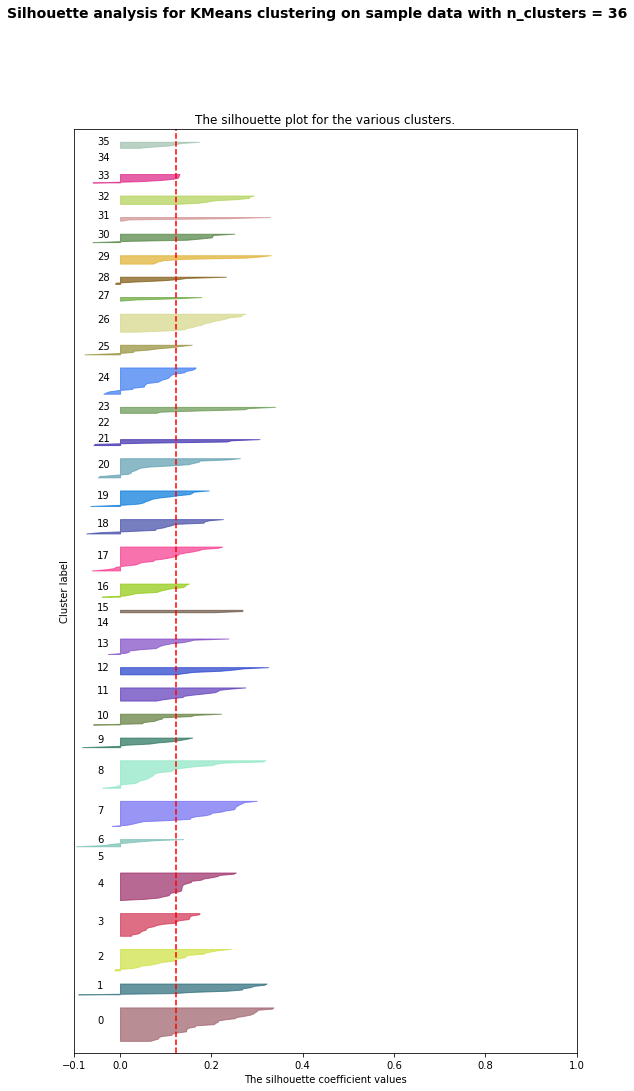

In [62]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [63]:
# set the number of clusters in the final model
my_n_clusters = 30

In [ ]:
# km = joblib.load('km.pkl')

In [76]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
# joblib.dump(km, 'km.pkl') # pickle

In [77]:
clusterList = []

for i in range(0, max(km.labels_)):
    print(" ")
#     print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
#     print("Images in cluster: " + str(i))
    clusterList.append(" <h1>'This is cluster " + str(i) + "</h1>")
#     print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
#             print(str(jZ+2) + '_small.jpg')
            artImage = " <img src='img_small/" + str(j+2) + "_small.jpg'> "
            clusterList.append(artImage)
            
print(clusterList)

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
[" <h1>'This is cluster 0</h1>", " <img src='img_small/145_small.jpg'> ", " <img src='img_small/180_small.jpg'> ", " <img src='img_small/297_small.jpg'> ", " <img src='img_small/298_small.jpg'> ", " <h1>'This is cluster 1</h1>", " <img src='img_small/5_small.jpg'> ", " <img src='img_small/19_small.jpg'> ", " <img src='img_small/21_small.jpg'> ", " <img src='img_small/32_small.jpg'> ", " <img src='img_small/38_small.jpg'> ", " <img src='img_small/64_small.jpg'> ", " <img src='img_small/120_small.jpg'> ", " <img src='img_small/121_small.jpg'> ", " <img src='img_small/130_small.jpg'> ", " <img src='img_small/143_small.jpg'> ", " <img src='img_small/148_small.jpg'> ", " <img src='img_small/185_small.jpg'> ", " <img src='img_small/191_small.jpg'> ", " <img src='img_small/209_small.jpg'> ", " <img src='img_small/223_small.jpg'> ", " <img src='img_small/329_small.jpg'> ", " <img src='img_small/343_small.jpg'> ", " <h1>'This is cluster 

In [78]:

#Save the array as an html file.  I had some encoding issues save AND CLOSE file.

import numpy as np
from pandas import *

for i in range(0, max(km.labels_)):
    

    df = pd.DataFrame(clusterList)
    df.to_html('picturePages.html')
    file = open('picturePages.html', "r")
    file = file.read()
    #file = file.replace('&lt;', '<').replace('&gt;', '>')
    file = file.replace('&lt;', '<').replace('&gt;', '>')
    file = str(file)
    print(file)
    file2 = open('clusters.html', 'w')
    file2.write(file)
    file2.close()


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td><h1>'This is cluster 0</h1></td>
    </tr>
    <tr>
      <th>1</th>
      <td><img src='img_small/145_small.jpg'></td>
    </tr>
    <tr>
      <th>2</th>
      <td><img src='img_small/180_small.jpg'></td>
    </tr>
    <tr>
      <th>3</th>
      <td><img src='img_small/297_small.jpg'></td>
    </tr>
    <tr>
      <th>4</th>
      <td><img src='img_small/298_small.jpg'></td>
    </tr>
    <tr>
      <th>5</th>
      <td><h1>'This is cluster 1</h1></td>
    </tr>
    <tr>
      <th>6</th>
      <td><img src='img_small/5_small.jpg'></td>
    </tr>
    <tr>
      <th>7</th>
      <td><img src='img_small/19_small.jpg'></td>
    </tr>
    <tr>
      <th>8</th>
      <td><img src='img_small/21_small.jpg'></td>
    </tr>
    <tr>
      <th>9</th>
      <td><img src='img_small/32_small.jpg'></td>
    </tr>
    

</table>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td><h1>'This is cluster 0</h1></td>
    </tr>
    <tr>
      <th>1</th>
      <td><img src='img_small/145_small.jpg'></td>
    </tr>
    <tr>
      <th>2</th>
      <td><img src='img_small/180_small.jpg'></td>
    </tr>
    <tr>
      <th>3</th>
      <td><img src='img_small/297_small.jpg'></td>
    </tr>
    <tr>
      <th>4</th>
      <td><img src='img_small/298_small.jpg'></td>
    </tr>
    <tr>
      <th>5</th>
      <td><h1>'This is cluster 1</h1></td>
    </tr>
    <tr>
      <th>6</th>
      <td><img src='img_small/5_small.jpg'></td>
    </tr>
    <tr>
      <th>7</th>
      <td><img src='img_small/19_small.jpg'></td>
    </tr>
    <tr>
      <th>8</th>
      <td><img src='img_small/21_small.jpg'></td>
    </tr>
    <tr>
      <th>9</th>
      <td><img src='img_small/32_small.jpg'></td>
    <

</table>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td><h1>'This is cluster 0</h1></td>
    </tr>
    <tr>
      <th>1</th>
      <td><img src='img_small/145_small.jpg'></td>
    </tr>
    <tr>
      <th>2</th>
      <td><img src='img_small/180_small.jpg'></td>
    </tr>
    <tr>
      <th>3</th>
      <td><img src='img_small/297_small.jpg'></td>
    </tr>
    <tr>
      <th>4</th>
      <td><img src='img_small/298_small.jpg'></td>
    </tr>
    <tr>
      <th>5</th>
      <td><h1>'This is cluster 1</h1></td>
    </tr>
    <tr>
      <th>6</th>
      <td><img src='img_small/5_small.jpg'></td>
    </tr>
    <tr>
      <th>7</th>
      <td><img src='img_small/19_small.jpg'></td>
    </tr>
    <tr>
      <th>8</th>
      <td><img src='img_small/21_small.jpg'></td>
    </tr>
    <tr>
      <th>9</th>
      <td><img src='img_small/32_small.jpg'></td>
    <

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td><h1>'This is cluster 0</h1></td>
    </tr>
    <tr>
      <th>1</th>
      <td><img src='img_small/145_small.jpg'></td>
    </tr>
    <tr>
      <th>2</th>
      <td><img src='img_small/180_small.jpg'></td>
    </tr>
    <tr>
      <th>3</th>
      <td><img src='img_small/297_small.jpg'></td>
    </tr>
    <tr>
      <th>4</th>
      <td><img src='img_small/298_small.jpg'></td>
    </tr>
    <tr>
      <th>5</th>
      <td><h1>'This is cluster 1</h1></td>
    </tr>
    <tr>
      <th>6</th>
      <td><img src='img_small/5_small.jpg'></td>
    </tr>
    <tr>
      <th>7</th>
      <td><img src='img_small/19_small.jpg'></td>
    </tr>
    <tr>
      <th>8</th>
      <td><img src='img_small/21_small.jpg'></td>
    </tr>
    <tr>
      <th>9</th>
      <td><img src='img_small/32_small.jpg'></td>
    </tr>
    

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td><h1>'This is cluster 0</h1></td>
    </tr>
    <tr>
      <th>1</th>
      <td><img src='img_small/145_small.jpg'></td>
    </tr>
    <tr>
      <th>2</th>
      <td><img src='img_small/180_small.jpg'></td>
    </tr>
    <tr>
      <th>3</th>
      <td><img src='img_small/297_small.jpg'></td>
    </tr>
    <tr>
      <th>4</th>
      <td><img src='img_small/298_small.jpg'></td>
    </tr>
    <tr>
      <th>5</th>
      <td><h1>'This is cluster 1</h1></td>
    </tr>
    <tr>
      <th>6</th>
      <td><img src='img_small/5_small.jpg'></td>
    </tr>
    <tr>
      <th>7</th>
      <td><img src='img_small/19_small.jpg'></td>
    </tr>
    <tr>
      <th>8</th>
      <td><img src='img_small/21_small.jpg'></td>
    </tr>
    <tr>
      <th>9</th>
      <td><img src='img_small/32_small.jpg'></td>
    </tr>
    